In [4]:
%reload_ext autoreload
%autoreload

1. download all parts of helen data - combine all into train folder (should hve 2330)
2. rename annotation files with image (1.txt -> 100032540_1_anno.txt)

In [1]:
from fastai.vision import *
from fastai.datasets import *

In [33]:
path = Path('/home/sudosharma/projects/data/helen/')

### Rename annotation files

In [31]:
def rename_anno_files(anno_path):
    for anno in anno_path.ls():
        if anno.stem.find('anno') > 0: 
            return
        with open(anno) as f:
            fname = f.readline().strip()
        anno.rename(anno.parent / f'{fname}_anno.txt')
    return

In [32]:
rename_anno_files(path/'annotation')

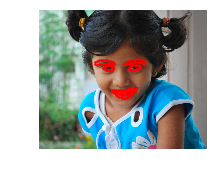

In [88]:
anno = (path/'annotation').ls()[500]
file = anno.name.replace('_anno.txt', '.jpg')
img = open_image(path/'train'/file)
points = []
with open(anno) as f:
    for line in f:
        points.append([float(coord) for coord in line.strip().split(',')][::-1])
points = torch.Tensor(points[59:])
points = ImagePoints(FlowField(img.size, points))
img.show(y=points)

### Prep Dataloader

In [97]:
get_y_fn = lambda o: path/'annotation'/f'{o.stem}_anno.txt'

data = (PointsItemList.from_folder(path)
        .split_by_rand_pct())

In [100]:
data.label

ItemLists;

Train: PointsItemList (1864 items)
Image (3, 1332, 1331),Image (3, 2304, 3456),Image (3, 3629, 2592),Image (3, 1381, 1124),Image (3, 566, 418)
Path: /home/sudosharma/projects/data/helen;

Valid: PointsItemList (466 items)
Image (3, 800, 600),Image (3, 898, 749),Image (3, 821, 1094),Image (3, 849, 861),Image (3, 726, 1024)
Path: /home/sudosharma/projects/data/helen;

Test: None